In [1]:
# Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import copy as cp
import importlib
import statsmodels.stats.outliers_influence as sso

import self_defined_functions as ft
import seaborn as sns

from matplotlib.ticker import FuncFormatter
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

In [2]:
importlib.reload( ft )

<module 'self_defined_functions' from 'c:\\PuSung\\University\\Sophomore\\110-2 Academic\\Satistics\\Statistics_FinalProject\\project_TRA\\self_defined_functions.py'>

In [3]:
ft.gen_ANOVA_xlsx()

In [4]:
df = pd.read_excel( 'ANOVA_df.xlsx' )

In [5]:
df = df[df['is_typhoon'] == False]
df = df[df['year'] < 2020]

In [6]:
df.head()

,Unnamed: 0,date,year,month,day,weekday,trans_cnt,metro_cnt,is_typhoon,is_working,day_type,is_foreign,holi_type,holi_len,phase,is_NYE,belong
0,0,2005-01-01,2005,1,1,5,382902,0,False,False,National,False,元旦,2,mid,False,National
1,1,2005-01-02,2005,1,2,6,412908,0,False,False,National,False,元旦,2,end,False,National
2,2,2005-01-03,2005,1,3,0,298141,0,False,True,weekday,False,None,0,None,False,None
3,3,2005-01-04,2005,1,4,1,252051,0,False,True,weekday,False,None,0,None,False,None
4,4,2005-01-05,2005,1,5,2,263399,0,False,True,weekday,False,None,0,None,False,None


# Part 1 

In [7]:
df_1 = df[df['belong'] != 'None']
df_1 = df_1[df_1['is_foreign'] == False]
df_1 = df_1[df_1['phase'] != 'None']

In [8]:
df_1.head()

,Unnamed: 0,date,year,month,day,weekday,trans_cnt,metro_cnt,is_typhoon,is_working,day_type,is_foreign,holi_type,holi_len,phase,is_NYE,belong
0,0,2005-01-01,2005,1,1,5,382902,0,False,False,National,False,元旦,2,mid,False,National
1,1,2005-01-02,2005,1,2,6,412908,0,False,False,National,False,元旦,2,end,False,National
6,6,2005-01-07,2005,1,7,4,403391,0,False,True,weekday,False,None,0,start,False,weekend
7,7,2005-01-08,2005,1,8,5,408412,0,False,False,weekend,False,None,2,mid,False,weekend
8,8,2005-01-09,2005,1,9,6,452831,0,False,False,weekend,False,None,2,end,False,weekend


In [9]:
results0 = smf.ols('trans_cnt ~ C(belong) + C(phase) + C(belong):C(phase)', data=df_1).fit()
aov_14106_two = sms.anova_lm( results0, typ=2 )

aov_14106_two

,sum_sq,df,F,PR(>F)
C(belong),6.965187e+11,2.0,31.017601,5.051835e-14
C(phase),6.119175e+11,2.0,27.250110,1.996081e-12
C(belong):C(phase),2.228479e+11,4.0,4.961968,5.536139e-04
Residual,2.646392e+13,2357.0,NaN,NaN


In [10]:
stats.shapiro( results0.resid )

ShapiroResult(statistic=0.9731783270835876, pvalue=1.1736901254431855e-20)

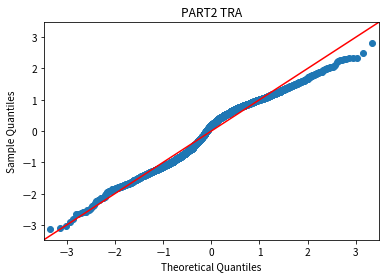

In [11]:
fig = sm.qqplot( results0.resid, stats.norm, fit=True, line = '45' ) 
plt.title( 'PART2 TRA' )
plt.savefig( 'images/TRA_PART2_ANOVA_qqplot.jpg' )

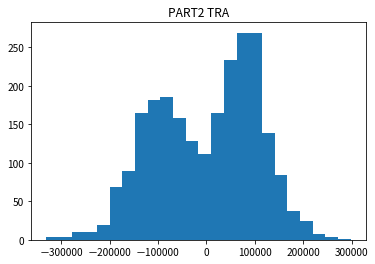

In [12]:
_ = plt.hist( results0.resid, bins='auto' )
plt.title( 'PART2 TRA' )
plt.savefig( 'images/TRA_PART2_ANOVA_hist.jpg' )

In [13]:
set( df_1['belong'] )

{'National', 'Traditional', 'weekend'}

In [14]:
# Set 
date_type_set = ['National', 'Traditional', 'weekend']
phase_set = ['start', 'mid', 'end']

In [15]:
y = {}
x = range( 3 )

In [16]:
for dtype in date_type_set : 
    y[dtype] = []
    for ptype in phase_set : 
        temp_df = df_1[np.array( df_1['phase'] == ptype ) & np.array( df_1['belong'] == dtype )]
        y[dtype].append( temp_df['trans_cnt'].mean() )

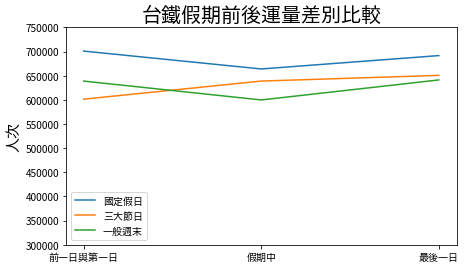

In [17]:
fig, ax = plt.subplots( figsize = ( 7, 4 ) )
plt.plot( x, y['National'], label = '國定假日' )
plt.plot( x, y['Traditional'], label = '三大節日' )
plt.plot( x, y['weekend'], label = '一般週末' )
plt.ylim( 300000, 750000 )
plt.xticks( x, ['前一日與第一日', '假期中', '最後一日'] )
plt.title( '台鐵假期前後運量差別比較', fontsize = 20 )
plt.ylabel( '人次', fontsize = 15 )
plt.legend()
plt.savefig( 'images/TRA_PART2_compare.jpg' )

In [18]:
trCnt = []
for dtype in date_type_set : 
    trCnt.append( df_1[df_1['belong'] == dtype]['trans_cnt'] )

In [19]:
ft.kruskal( trCnt[0], trCnt[1], trCnt[2] )

9.592326932761353e-14

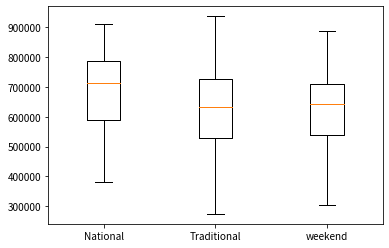

In [20]:
plt.boxplot( trCnt )
plt.xticks( range( 1, 4 ), date_type_set )
plt.show()

# Part 2 

In [21]:
df.head()

,Unnamed: 0,date,year,month,day,weekday,trans_cnt,metro_cnt,is_typhoon,is_working,day_type,is_foreign,holi_type,holi_len,phase,is_NYE,belong
0,0,2005-01-01,2005,1,1,5,382902,0,False,False,National,False,元旦,2,mid,False,National
1,1,2005-01-02,2005,1,2,6,412908,0,False,False,National,False,元旦,2,end,False,National
2,2,2005-01-03,2005,1,3,0,298141,0,False,True,weekday,False,None,0,None,False,None
3,3,2005-01-04,2005,1,4,1,252051,0,False,True,weekday,False,None,0,None,False,None
4,4,2005-01-05,2005,1,5,2,263399,0,False,True,weekday,False,None,0,None,False,None


In [22]:
df_2  = df[np.array( df['belong'] == 'None' ) | np.array( df['belong'] == 'weekend' ) ]

In [23]:
results1 = smf.ols('trans_cnt ~ C(is_foreign) + C(is_working) + C(is_foreign):C(is_working)', data=df_1).fit()
aov_14106_two = sms.anova_lm( results1, typ=2 )

aov_14106_two

c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1900: RuntimeWarning: invalid value encountered in true_divide
  F /= J
c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does n

,sum_sq,df,F,PR(>F)
C(is_foreign),NaN,1.0,NaN,NaN
C(is_working),NaN,1.0,NaN,NaN
C(is_foreign):C(is_working),NaN,1.0,NaN,NaN
Residual,2.786186e+13,2364.0,NaN,NaN


In [24]:
stats.shapiro( results1.resid )

ShapiroResult(statistic=0.9821327328681946, pvalue=1.1476317053450507e-16)

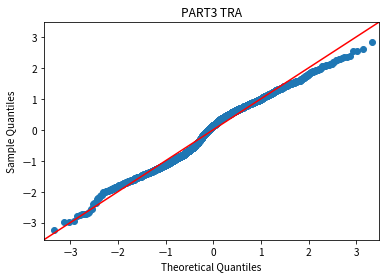

In [25]:
fig = sm.qqplot( results1.resid, stats.norm, fit=True, line = '45' ) 
plt.title( 'PART3 TRA' )
plt.savefig( 'images/TRA_PART3_ANOVA_qqplot.jpg')

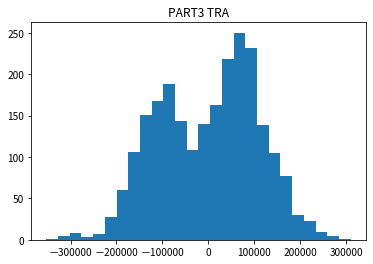

In [26]:
plt.hist( results1.resid, bins='auto' )
plt.title( 'PART3 TRA' )
plt.savefig( 'images/TRA_PART3_ANOVA_hist.jpg')

In [27]:
trCnt = []
for btype in [True, False] : 
    trCnt.append( list( df_2[df_2['is_foreign'] == btype]['trans_cnt'] ) )

In [28]:
ft.kruskal( trCnt[0], trCnt[1] )

0.013232308021484784

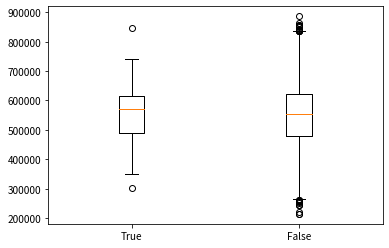

In [29]:
plt.boxplot( trCnt )
plt.xticks( range( 1, 3 ), [True, False] )
plt.show()

# Part 3 

In [30]:
df_3 = df[df['belong'] != 'None']

In [31]:
df_3.head()

,Unnamed: 0,date,year,month,day,weekday,trans_cnt,metro_cnt,is_typhoon,is_working,day_type,is_foreign,holi_type,holi_len,phase,is_NYE,belong
0,0,2005-01-01,2005,1,1,5,382902,0,False,False,National,False,元旦,2,mid,False,National
1,1,2005-01-02,2005,1,2,6,412908,0,False,False,National,False,元旦,2,end,False,National
6,6,2005-01-07,2005,1,7,4,403391,0,False,True,weekday,False,None,0,start,False,weekend
7,7,2005-01-08,2005,1,8,5,408412,0,False,False,weekend,False,None,2,mid,False,weekend
8,8,2005-01-09,2005,1,9,6,452831,0,False,False,weekend,False,None,2,end,False,weekend


In [32]:
cnt = []
holi_len = []

phase = list( df_3['phase'] )
trans_cnt = list( df_3['trans_cnt'] )
holi_len_all = list( df_3['holi_len'] )

accu = 0
le = 0 
for i in range( 2, len( phase ) ) :
    if phase[i] == 'start' : 
        accu += trans_cnt[i]
        le += 1 
    elif phase[i] == 'end' : 
        accu += trans_cnt[i]
        le += 1 
        cnt.append( accu / le )
        accu = 0 
        le = 0 
        holi_len.append( holi_len_all[i] )  

In [33]:
df_3_ = pd.DataFrame( { 'trans_cnt' : cnt, 'holi_len': holi_len } )

In [34]:
results2 = smf.ols('trans_cnt ~ C(holi_len)', data=df_3_).fit()
aov_14106_two = sms.anova_lm( results2, typ=2 )

aov_14106_two

,sum_sq,df,F,PR(>F)
C(holi_len),3.004132e+11,3.0,10.03933,0.000002
Residual,7.381161e+12,740.0,NaN,NaN


In [35]:
stats.shapiro( results2.resid )

ShapiroResult(statistic=0.960867166519165, pvalue=3.379672301566383e-13)

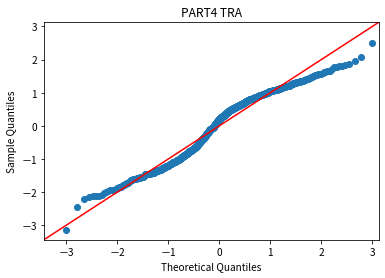

In [36]:
fig = sm.qqplot( results2.resid, stats.norm, fit=True, line = '45' ) 
plt.title( 'PART4 TRA' )
plt.savefig( 'images/TRA_PART4_ANOVA_qqplot.jpg')

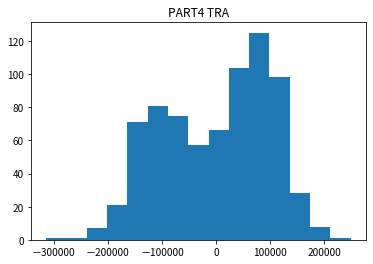

In [37]:
_ = plt.hist( results2.resid, bins='auto' )
plt.title( 'PART4 TRA' )
plt.savefig( 'images/TRA_PART4_ANOVA_hist.jpg')

In [38]:
trCnt = [[],[],[],[]]
for i in range( len( cnt ) ) : 
    trCnt[holi_len[i]-2].append( cnt[i] ) 

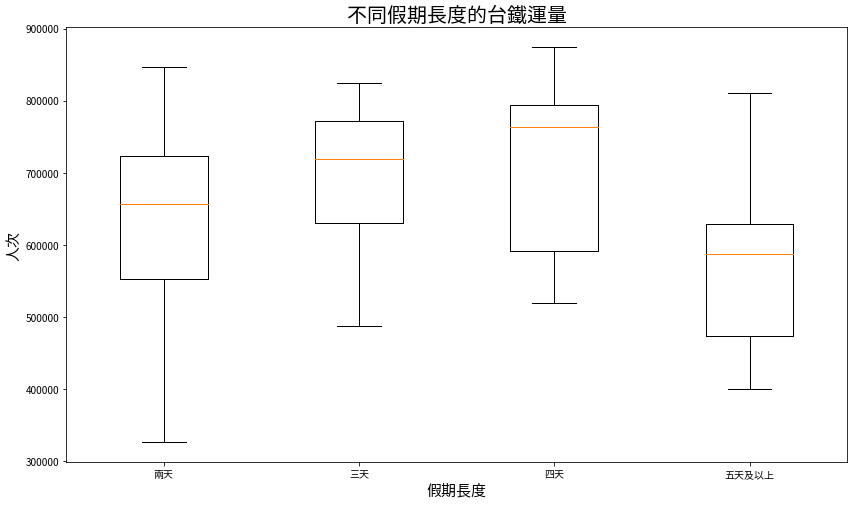

In [81]:
fig, ax = plt.subplots( figsize = ( 14, 8 ) )
plt.boxplot( trCnt )
plt.xticks( range( 1, 5 ), ['兩天', '三天', '四天', '五天及以上'] )
plt.title( '不同假期長度的台鐵運量', fontsize = 20 )
plt.xlabel( '假期長度', fontsize = 15 )
plt.ylabel( '人次', fontsize = 15 ) 
plt.savefig( 'images/TRA_PART$_compare.jpg' )
plt.show()

四天以下真的有節節上升的趨勢；五天的話感覺是大家會想要避開尖峰時間，所以不見得會選擇第一天跟最後一天才回家

In [40]:
ft.kruskal( trCnt[0], trCnt[1], trCnt[2], trCnt[3] )

1.6415555681437155e-07